# Тестовое задание ML&Texts, ЛШ2020
**Выполнила:** Екатерина Такташева
## Задание 1

Импортируем все необходимые для решения модули:

In [93]:
import json
from pprint import pprint
import numpy as np
from collections import Counter
from string import punctuation
from nltk.corpus import stopwords
stopwords = set(stopwords.words('russian'))
from pymystem3 import Mystem
ms = Mystem()

Считываем .json файл:

In [3]:
with open('letnyayashkola_vk.json', 'r', encoding='utf-8') as fid:
    data = json.load(fid)

Вспомогательные функции:

In [6]:
def clear_punct(text: str) -> str:
    
    """
    Gets rid of punctuation in the string
    and converts to lower case
    """
    
    PUNCT = list(punctuation) + [' - ', '- ', ' -', '«', '»', '—', '–']
    text = text.lower()
    for char in PUNCT:
        text = text.replace(char, '')
    return text

In [7]:
def preprocess(text: str) -> str:
    
    """
    Clears the string from punctuation and
    stopwords, lemmatizes words
    """
    
    text = clear_punct(text)
    words = text.split()
    cleared_text = []
    for word in words:
        if word not in stopwords:
            cleared_text.append(word)
    return ' '.join(cleared_text).strip()

In [8]:
def parse_posts(data: dict) -> np.array:
    
    """
    Parses the dictionary and creates a
    numpy array with objects of the form
    [post_text, comments_text]
    """
    
    posts = []
    for post in data:
        comments_texts = []
        for comment in post['textcomment']['items']:
            comments_texts.append(comment['text'])
        comments = ' '.join(comments_texts)
        posts.append([preprocess(post['text']), preprocess(comments)])
    return np.array(posts)

In [96]:
def lemmas(data: np.array):
    
    """
    Lemmatizes text in data array
    """
    
    for item in data:
        item[0] = ' '.join(ms.lemmatize(item[0]))
        item[1] = ' '.join(ms.lemmatize(item[1]))
    return data

Обработаем данные:

In [73]:
text_data = parse_posts(data)  # создаем массив данных

In [97]:
%%time
lem_text_data = lemmas(text_data)

CPU times: user 4.21 s, sys: 1.61 s, total: 5.82 s
Wall time: 29.3 s


In [100]:
lem_text_data[:3]

array([['распространение   пандемия   covid19   набирать   оборот   оргкомитет   летний   школа   получать   все   тревожный   вопрос   судьба   лш2020   считать   мы   пора   рассказывать   наш   отношение   происходить   короче   планировать   начинать   набор   участник   1   апрель \n',
        ''],
       ['среда   1   апрель   начинаться   набор   мастерская   сезон   2020   признаваться   изза   весь   кутерьма   называть   сомнение   никуда   деваться   ситуация   обескураживать   заставлять   просчитывать   запасной   вариант   выдумывать   новый   кульбит   искать   позабывать   придумывать   решение   читать   наш   манифест   быть   откровенный   чтото   вроде   манифест   знать   один   основополагающий   принцип   лш   это   сделать   невозможный   это   сделать   поэтому   быть   уверенный   сомнение   оставаться   смотреть   будущее   надежда   15   неделя   осталосьдо   лш2020 \n',
        'крайний   случай   лш   уходить   дистанционка \n'],
       ['время   оставатьс

Найдем самые частотные слова в постах и комментариях отдельно:

In [11]:
def get_freq(data: np.array, ind: int) -> dict:
    
    """
    ind - index of the object:
    0 for the text of the posts
    1 for the comments
    
    Returns a frequency dictionary
    of the chosen object type
    """
    freq = Counter()
    for obj in text_data:
        words = obj[ind].split()
        freq += Counter(words)
    return freq

In [101]:
%%time
most_comm_posts = get_freq(text_data, 0).most_common()
most_comm_comm = get_freq(text_data, 1).most_common()

CPU times: user 10.3 s, sys: 711 ms, total: 11 s
Wall time: 11.8 s


Импортируем модули для визуализации:

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from matplotlib import style
style.use('ggplot')

**Построим список самых частотных слов в постах:**

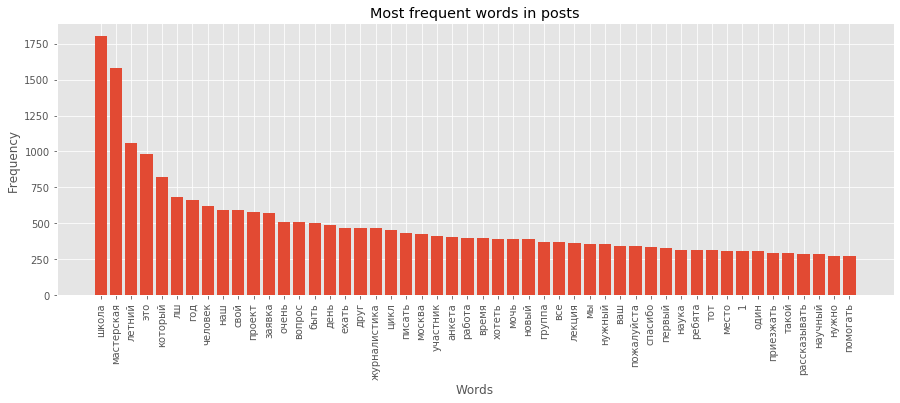

In [103]:
plt.figure(figsize=(15, 5))
plt.bar(range(50), [i[1] for i in most_comm_posts[:50]])
plt.xticks(range(50), [i[0] for i in most_comm_posts[:50]], rotation=90)
plt.title('Most frequent words in posts')
plt.xlabel('Words')
plt.ylabel('Frequency');

Заметим, что самыми частотными оказались ожидаемые для группы слова типа *школа, матсерская, летний, лш, цикл* и др., а самыми частотными глаглами оказались *быть, ехать, писать, хотеть, приезжать, расказывать и помогать*, часть из которых в принципе частотна, а часть очень свойственна постам в группе, посыл которых - информация о матсерских и том, как можно приехать на ЛШ. Интересно, что из названий мастерских встретилась только журналистика, хотя это может быть связано с тем, что были скачаны не все посты. Еще в список частотных слов попала 1, что сначала показалось странным, а потом стало понятным, что это скорее всего связано а тем, что в постах часто упоминаются номера циклов, а также информация о количестве дней до начала школы и похожая информация. Приятно, что одними из самых частотных слов оказались *спасибо* и *пожалуйста*)

**Теперь список самых частотных слов в комментариях:**

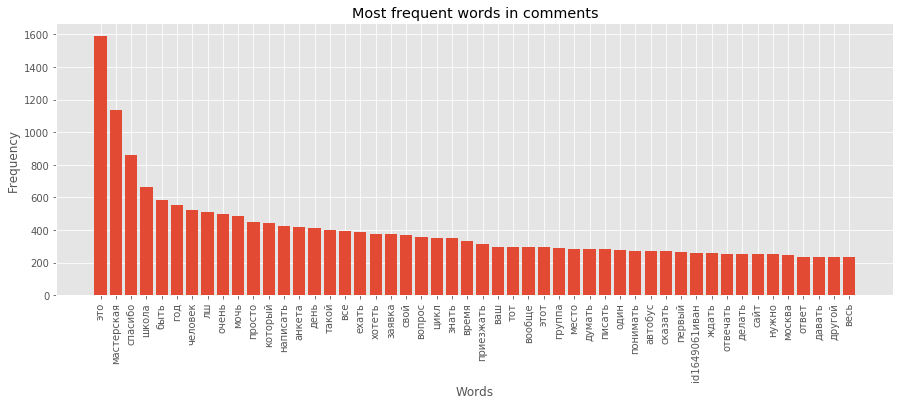

In [104]:
plt.figure(figsize=(15, 5))
plt.bar(range(50), [i[1] for i in most_comm_comm[:50]])
plt.xticks(range(50), [i[0] for i in most_comm_comm[:50]], rotation=90)
plt.title('Most frequent words in comments')
plt.xlabel('Words')
plt.ylabel('Frequency');

В текстах комментариев в список самых частотных слов также попали ожидаемые *мастерская, школа, лш, цикл* и другие, аналогично с глаголами. При этом в комментариях часто упоминаются слова *вопрос, анкета, заявка, автобус, время* и др., что говорит о том, что, возможно, под постами часто задают вопросы о том, как попасть на ЛШ, в том числе буквально на каком транспорте добраться, когда она проходит и похожая информация, что логично. Еще в список частотных слов попал тэг кого-то из админов группы, которого видимо часто отмечают для ответа на вопрос. 

 ## Задание 2.1

Импортируем нужные модули:

In [17]:
import os
import mimetypes

Вспомогательные функции:

In [63]:
def update_counter(file: str, freq: dict):
    
    """
    Adds new words and their frequences
    to the dictionary
    """
    
    with open(file, 'r', encoding='utf-8') as fid:
        text = fid.read()
    words = text.strip().split()
    freq += Counter(words)

Пройдем по папкам и создадим словарь частотности встретившихся в текстовых файлах слов:

P.S. для проверки файла на бинарность/тектовость используется модуль mimetypes (https://docs.python.org/3.6/library/mimetypes.html)

In [64]:
freq_dict = Counter()
for root, dirs, files in os.walk('dirs_task'):
    for file in files:
        path = os.path.join(root, file)
        file_type = mimetypes.guess_type(path)  # достает тип файла
        if file_type[0] and 'text' in file_type[0]:  # отсеивает бинарные файлы
            update_counter(path, freq_dict) 

Посмотрим на список самых частотных слов:

In [67]:
freq_dict.most_common()

[('meow', 11), ('woof', 3), ('bark', 3), ('murr', 1)]

P.S. в этом задании слова так же можно лемматизировать при помощи того же mystem'а для получения лучшего результата в зависимости от сожержания и целей создания частотного списка

## Задание 3

Считываем тектовый файл дла работы и список стопслов для русского языка:

In [124]:
with open('female.txt', encoding='utf-8') as fid:
    text = fid.read()
with open('stopwords-ru.txt', encoding='utf-8') as f:
    stopwords = f.read().split()

Используем написанную в задании 1 функцию для очистки текста:

In [125]:
text = preprocess(text)

Поскольку мы просто хотим посмотреть на список частотных слов, то лемматизируем текст:

In [127]:
%%time
text = ''.join(ms.lemmatize(text))

CPU times: user 44.8 ms, sys: 6.66 ms, total: 51.5 ms
Wall time: 243 ms


Посмотрим на список 20 самых частотных слов:

In [129]:
freq_words = Counter(text.split()).most_common()[:20]

In [130]:
freq_words

[('the', 175),
 ('of', 118),
 ('project', 87),
 ('to', 80),
 ('or', 78),
 ('and', 70),
 ('you', 69),
 ('in', 57),
 ('a', 57),
 ('gutenbergtm', 56),
 ('женщина', 52),
 ('this', 49),
 ('with', 47),
 ('work', 45),
 ('any', 37),
 ('works', 32),
 ('gutenberg', 29),
 ('движение', 28),
 ('рабочий', 27),
 ('electronic', 27)]

Как можно заметить, в список попали не только русские слова, но поскольку мы хотим посмотреть на частотные русские слова, очистим текст от латинских символов с помощью регулярных выражений:

In [131]:
import re

In [132]:
russian_text = re.sub(r'[A-Za-z]', '', text)

Посмотрим на новый частотный список:

In [133]:
freq_words_ru = Counter(russian_text.split()).most_common()[:20]

In [134]:
freq_words_ru

[('женщина', 52),
 ('движение', 28),
 ('рабочий', 27),
 ('борьба', 26),
 ('женский', 25),
 ('война', 23),
 ('работница', 22),
 ('партия', 20),
 ('организация', 19),
 ('социалистический', 17),
 ('страна', 17),
 ('конференция', 16),
 ('свой', 14),
 ('который', 13),
 ('коммунистический', 12),
 ('союз', 11),
 ('масса', 11),
 ('социальный', 11),
 ('принимать', 11),
 ('1', 11)]

**Построим график:**

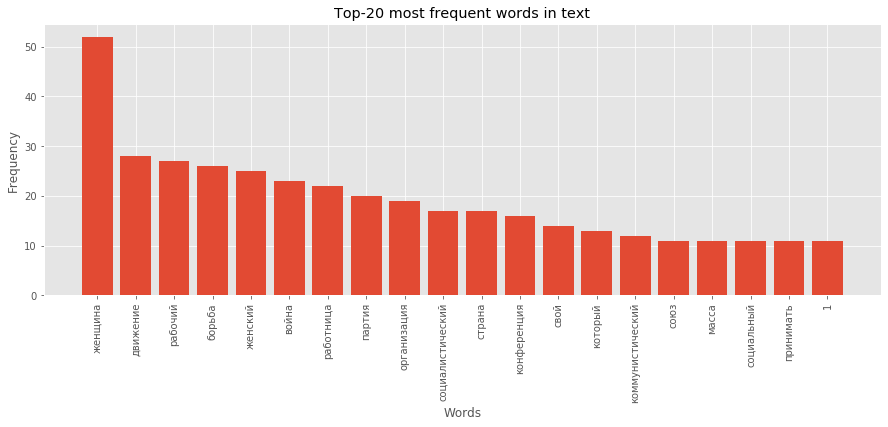

In [135]:
plt.figure(figsize=(15, 5))
plt.bar(range(20), [i[1] for i in freq_words_ru])
plt.xticks(range(20), [i[0] for i in freq_words_ru], rotation=90)
plt.title('Top-20 most frequent words in text')
plt.xlabel('Words')
plt.ylabel('Frequency');

Как и стоило ожидать, в список частотных слов попали слова *женщина, движение, рабочий, борьба* и тд., которые точно отображают тематику и сожердание текста, написанного о женском международном движении.


P.S. Заметим, что в список попало число 1, которое часто встречается в описании файла в вещах типа "paragraphs 1e1 through 1e7", но я решила не удалять все числовые символы, поскольку в таком случае можно потерять, например, года, а они могут упоминаться часто и могут дать информацию о тексте. + Удаление таких последовательностей кажется нерациональным, поскольку это скорее выборосы, чем частые occurences, поэтому при работе с бОльшим текстом они скорее не попадут в список самых частотных слов. 

## Задание 4

Считаем файлы с нужными изменениями и создадим словарь вида: {слово: его замена}

In [401]:
with open('changes.csv', encoding='utf-8') as fid:
    table = fid.readlines()
changes = {}
for line in table[1:]:
    line = line.strip().split(',')
    changes[line[0]] = line[1]

In [402]:
changes

{'языка': 'носка',
 'сосочки': 'сосиски',
 'слизистой': 'пряной',
 'язык': 'носок',
 'мышца': 'мать',
 'оболочка': 'клетка',
 'и': 'авось',
 'поверхности': 'кафеля',
 'клеток': 'плотков',
 'ежи': 'страусы',
 'ежей': 'страусов',
 'в': 'снаружи',
 'обычно': 'никогда',
 'животные': 'люди',
 'находится': 'бывает',
 'иглы': 'прутья',
 'себя': 'их',
 'довольно': 'недовольно',
 'еж': 'страус',
 'высокотоксичный': 'высокоградусный',
 'субкультуры ': 'сцены',
 'готической': 'эмо',
 'или': 'дабы',
 'для': 'вестимо',
 'готов': 'эмо',
 'представителей': 'коллеги',
 'готы': 'эмо',
 'можно': 'нельзя',
 'между': 'вне',
 'элементы': 'контрагенты',
 'время': 'бремя',
 'популярность': 'мизерность',
 'поклонники': 'эщкере'}

Считаем все тексты в одну переменную:

In [641]:
with open('Готы (субкультура) — Википедия.html', encoding='utf-8') as fid:
    text = fid.read()
with open('Обыкновенный ёж — Википедия.html', encoding='utf-8') as fid:
    text += fid.read()
with open('Язык (анатомия) — Википедия.html', encoding='utf-8') as fid:
    text += fid.read()

Циклом пройдем по всем заменам и тексту, заменяя по слова на их соответсвия в словаре:

In [642]:
for word, change in changes.items():
    pattern_1 = r'(\b|_)' + word + r'(\b|_)'  # шаблон для замены слов со строчной
    change_1 = r'\g<1>' + change + r'\g<2>'
    text = re.sub(pattern_1, change_1, text)  
    pattern_2 = r'(\b|_)' + word.title() + r'(\b|_)'  # шаблон для замены слов с прописной
    change_2 = r'\g<1>' + change.title() + r'\g<2>'
    text = re.sub(pattern_2, change_2, text)

Запишем полученный текст в новый файл:

In [644]:
with open('output.html', 'w', encoding='utf-8') as fid:
    fid.write(text)

P.S. В задании я столкнулось с проблемой, заключающейся в том, что, несмотря на то, что позиционируется как любой небуквенный символ, \b в юникоде не учитывает числа и знак _ (что грустно), поэтому приходится использовать запоминающие группы, если необходимо заменять тектс внутри ссылок. При этом в регулярных выражениях числа не учитываются, поскольку в текстах и ссылках они не встречаются сразу перед или после слов + добавить их при неоюходимости не сложно.